In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from hexagon_utilities import *
from colors import *
from plot_functions import *

import matplotlib.pyplot as plt

## Rows of Small Circles can make a Hexagonal Shape

The 3-4-5 is the most basic construction

For a flat-hexagon: There would be: Row1:3, Row2:4, Row3:5, Row4:4, Row5:3

For the mathematical question is, where are the centers of each of these small circles? And what is a good radius to use>


In [17]:
h.h

1.7320508075688772

(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

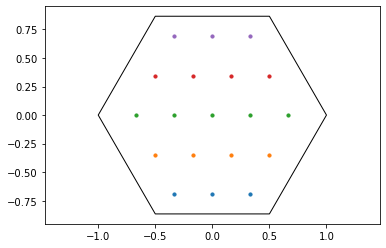

In [30]:
fig, ax = plt.subplots()
size=1
h = Hex(0,0, size)
h.get_verts()
h.render(fill=None)

dist = size/3
ysteps = [h.h/5 * (y-2) for y in range(5)]
for row, num_circs in enumerate([3,4,5,4,3]):
    xoffset = (num_circs - 1)/2
    xsteps= [(n-xoffset)*dist for n in range(num_circs)]    
    y = [ysteps[row]]* num_circs
    ax.scatter(xsteps, y, s=10)


plt.axis('equal')

### What if we move the center to a different coordinate?

Origin is easy. Let's move to a different x,y as the hex center

(1.9, 4.1, 3.0473720558371173, 4.9526279441628835)

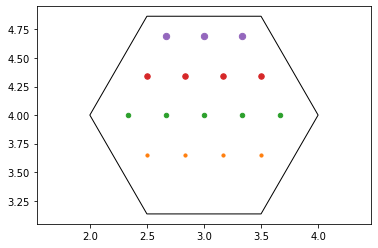

In [40]:
fig, ax = plt.subplots()
size=1
h = Hex(3,4, size)
h.get_verts()
h.render(fill=None)

xdist = size/3
ystep = h.h/5
          
for row, num_circs in enumerate([3,4,5,4,3]):
    xoffset = (num_circs - 1)/2
    xs = [h.x+(n-xoffset)*xdist for n in range(num_circs)]    
    ys = [h.y + (row - 2)*ystep] * num_circs
    ax.scatter(xs, ys, s=10*row)


plt.axis('equal')

In [92]:
# #11 rows starting from 3.
# 3,4,5,6,7,8,7,6,5,4,3

# max_num_circles = 8
# width = 2*h.size

# # xstep should be width/max_num_circles minus a little bit of adjustment
num_rows = 11
min_circles = 3
circles_added_between_rows =2 
max_num_circles_in_row = (num_rows//2)*circles_added_between_rows + min_circles
print(max_num_circles_in_row)

13


In [100]:
def get_small_circle_centers(h, num_rows, min_circles, circles_added_between_rows=1):
    """
    Returns the centers of small circles that sit in rows completely inside a given hexagon
    
    num_rows: integer
        Number of rows of small circles desired
    min_circles: integer
        Number of circles in the outermost row. This is the smallest because it is also the smallest row
        
    The max width of a flat hexagon is 2 x h.size at its widest
    """
    
    #This had to be calculated carefully. num_rows//2 is the WIDEST ROW. 
    #It's number of circles has to be the max. 
    max_num_circles_in_row = (num_rows//2)*circles_added_between_rows + min_circles
    xstep = 2*h.size / max_num_circles_in_row
    #xstep = h.size/min_circles
    ystep = h.h/num_rows
    
    direction_toggle = 1
    xs, ys = [], []
    for row in range(num_rows):
        mult = row
        if row > num_rows/2:
            mult = num_rows -1 - row
        num_circs = min_circles + mult * circles_added_between_rows
        xoffset = (num_circs - 1)/2
        xs.extend([h.x+(n-xoffset)*xstep for n in range(num_circs)]    )
        ys.extend([h.y + (row - num_rows//2)*ystep] * num_circs)
        
    return(xs, ys)

(1.9, 4.1, 6.0473720558371165, 7.9526279441628835)

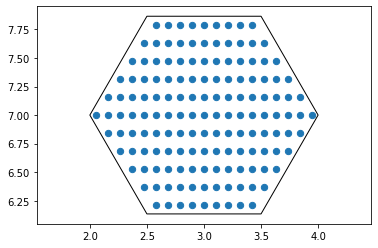

In [101]:
fig, ax = plt.subplots()
size=1
h = Hex(3,7, size)
h.get_verts()
h.render(fill=None)

xs, ys = get_small_circle_centers(h, 11, 9,2)          
ax.scatter(xs, ys, s=10*row)


plt.axis('equal')

(1.9, 4.1, 6.028897644669694, 7.971102355330306)

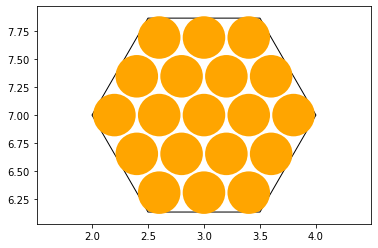

In [112]:
fig, ax = plt.subplots()
size=1
h = Hex(3,7, size)
h.get_verts()
h.render(fill=None)

xs, ys = get_small_circle_centers(h, 5, 3,1)          

for x,y in zip(xs, ys):
    circle = mpatches.Circle((x,y), 0.19, fc='orange')
    ax.add_patch(circle)

#ax.scatter(xs, ys, s=10*row)


plt.axis('equal')

In [154]:
def plot_small_circles(h, num_rows, min_circles, radius, circle_step=1,  **kwargs):

    xs, ys = get_small_circle_centers(h, num_rows, min_circles,1)          
    for x,y in zip(xs, ys):        
        circle = mpatches.Circle((x,y), radius, **kwargs)
        ax.add_patch(circle)


(1.9110000000000003, 4.0889999999999995, 6.028897644669694, 7.971102355330306)

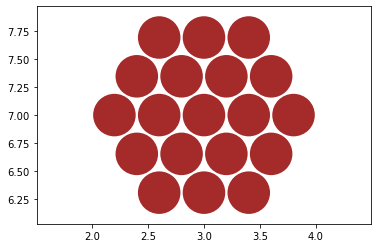

In [155]:
fig, ax = plt.subplots()
size=1
h = Hex(3,7, size)
h.get_verts()
#h.render(fill=None)

plot_small_circles(h, 5, 3, radius=0.19, fc='brown')
plt.axis('equal')

## Idea Behind these sets of Images

1. A colored background. Dark to start with.

1b. No Hexagon borders

2. For each hex in HexGrid, draw a bunch of Circles (all inside the Hexagon)
3. Render them. with some High Saturation color

The interesting part would be if the Hexagons can be picked out, from a plane full of circles

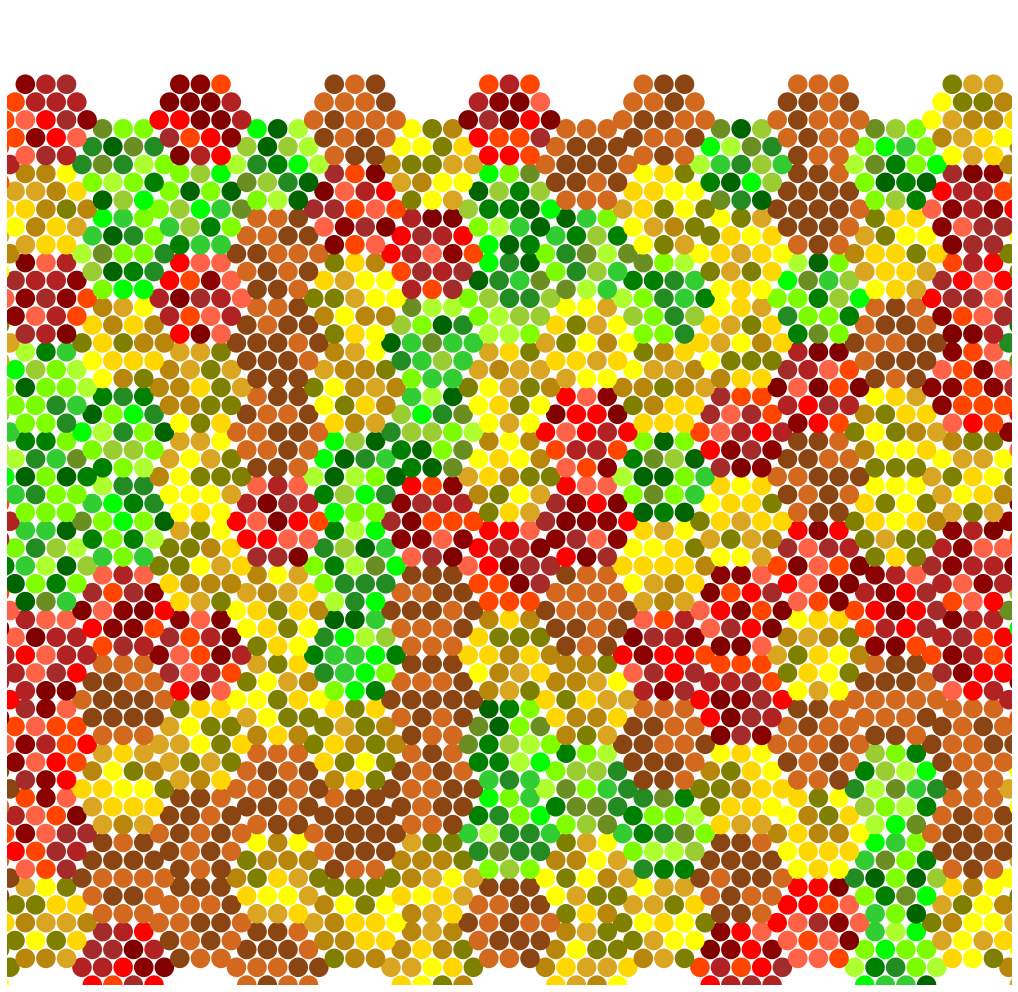

In [153]:
fig, ax = plt.subplots(figsize=(18,18))

bg_color = np.random.choice(YELLOWS_HIGH_SAT)
bg_color = 'white'
fc_bg = bg_color
fig.patch.set_facecolor(fc_bg)

size=2
hg = HexGrid(20,12,size, flat=True)

COL = BLUES_HIGH_SAT + RED_BROWNS_HIGH_SAT #+ PINKS_LOW_SAT

COL = RED_BROWNS_HIGH_SAT
#COL = PINKS_LOW_SAT
#COL = YELLOWS_HIGH_SAT + GREENS_HIGH_SAT
#COL = BLACK_WHITES_LOW_SAT

for idx, h in enumerate(hg.hlist):    
            
    plot_small_circles(h, 5,3, 0.38)
        
    if np.random.random() > 2:
        _col = COL[np.random.randint(len(COL))]
        h.render(fill=None, lw=2, color='k', zorder=3)
            
    
plt.axis('equal')
#ax.set_aspect('equal')
#ax.set_xlim(-10, 10)
#ax.set_ylim(-20, 20)
ax.set_ybound(lower=-18, upper=20)
ax.set_xbound(lower=-18, upper=20)
plt.axis('off')

save_file(fig, 'Nb10_SmallCirc')

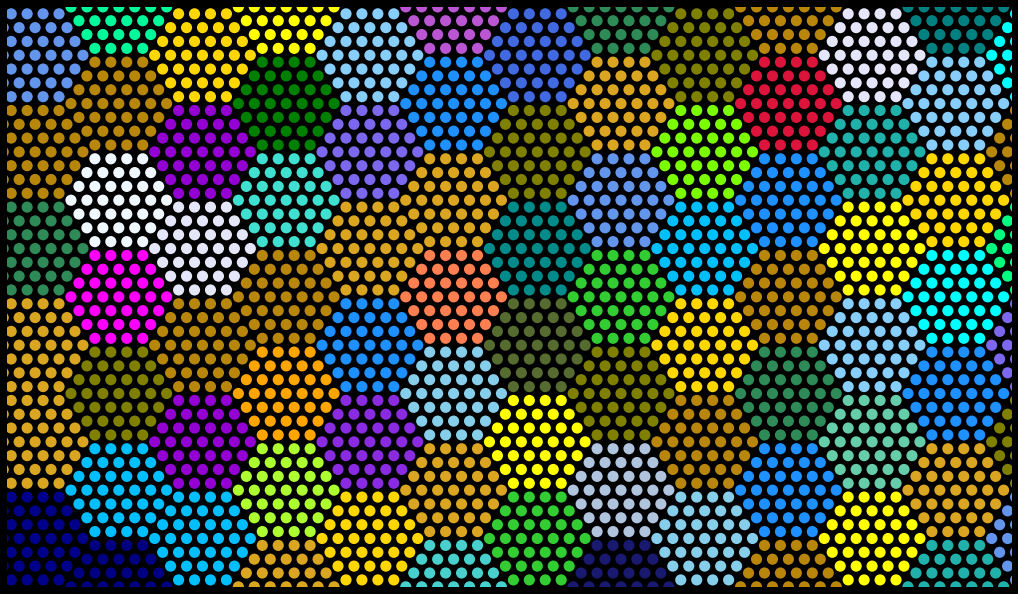

In [202]:
fig, ax = plt.subplots(figsize=(18,18))

bg_color = np.random.choice(YELLOWS_HIGH_SAT)
bg_color = 'black'
fc_bg = bg_color
fig.patch.set_facecolor(fc_bg)

size=1
num_rows, num_cols = 20, 12
hg = HexGrid(num_rows, num_cols, size, flat=True)

COL = BLUES_HIGH_SAT + RED_BROWNS_HIGH_SAT #+ PINKS_LOW_SAT

COL = RED_BROWNS_HIGH_SAT
#COL = PINKS_LOW_SAT
#COL = YELLOWS_HIGH_SAT + GREENS_HIGH_SAT
#COL = BLACK_WHITES_LOW_SAT

for idx, h in enumerate(hg.hlist):    
    
    col_fam = np.random.choice([RED_BROWNS_HIGH_SAT, YELLOWS_HIGH_SAT, GREENS_HIGH_SAT, BROWNS_HIGH_SAT])#, PINKS_HIGH_SAT])
    col_fam = HIGH_SAT if h.zc %3 else BLUES_HIGH_V
    if not h.yc %3:
        col_fam =  YELLOWS_HIGH_SAT
    
    col = np.random.choice(col_fam)
            
    plot_small_circles(h, 7,4, 0.1*size, fc=col)
        
    if np.random.random() > 2:
        _col = COL[np.random.randint(len(COL))]
        h.render(fill=None, lw=2, color='k', zorder=3)
    
#plt.axis('equal')
ax.set_aspect('equal')
#ax.set_xlim(-10, 10)
#ax.set_ylim(-20, 20)
xclip, yclip = 0.75, 0.6
y_range = size * 1.732 * num_rows / 4 * yclip
x_range = size * 2 * num_cols/2 * xclip
ax.set_ybound(lower=-1*y_range, upper=y_range)
ax.set_xbound(lower=-1*x_range, upper=x_range)
plt.axis('off')

save_file(fig, 'Nb10_SmallCirc_2color')

2